In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Question 3.4

In [2]:
def Izhikevich(I, a, b, c, d):
    """
    Runs a Izhikevich simulation on neuron and returns outputted voltage

            Parameters:
                    a (double): The time scale of the recovery recovery variable U
                    b (double): The sensitivity of the recovery variable U
                    c (double): The after spike reset value of the membrane potential V caused by fast high-threshold K+ conductances
                    d (double): The after spike reset value of the recovery variable U caused by slow high-threshold Na+ and K+ conductances
                    
            Returns:
                    V (double[]): A list of the output voltages in mV
    """

    V_thresh = 30
    V_rest = -65
    
    dT = 0.02
    T = (I.size) * dT
    time = np.arange(0, T, dT)
    
    # cell voltage
    V = (-65) * np.ones(len(time))
    # membrane recovery
    U = np.zeros(len(time))
    U[0] = b * V[0]

    for i in range(0, len(time) - 1):
        # U[current] = slope of U[previous] * time(current-previous)
        U[i + 1] = U[i] + dT * (a * (b * V[i] - U[i]))
        # V[current] = slope of V[previous] * time(current-previous)
        V[i + 1] = V[i] + dT * (0.04 * V[i] ** 2 + 5 * V[i] + 140 - U[i] + I[i])

        # when v reaches 30 mV, the cell fires, and then v is reset to c, and u increases by d
        if V[i + 1] > V_thresh:
            V[i + 1] = c
            U[i + 1] = U[i + 1] + d
    return V


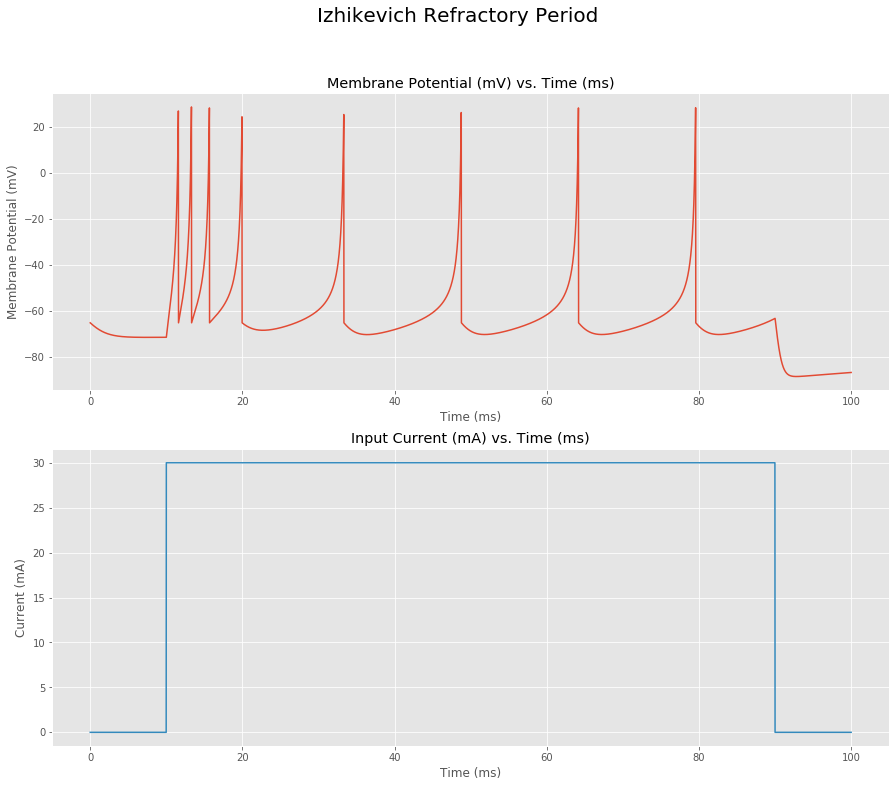

In [3]:
T = 100
dT = 0.02
time = np.arange(0, T + dT, dT)
I = np.zeros(len(time))
I[500:4500] = 30

V = Izhikevich(I=I, a=0.02, b=0.2, c=-65, d=8)

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))
fig.suptitle("Izhikevich Refractory Period", fontsize=20)

ax1.plot(time, V, label="Membrane Potential")
ax1.set_title("Membrane Potential (mV) vs. Time (ms)")
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xlabel("Time (ms)")

ax2.plot(time, I, "C1", label="Input Current")
ax2.set_title("Input Current (mA) vs. Time (ms)")
ax2.set_ylabel("Current (mA)")
ax2.set_xlabel("Time (ms)")

plt.show()


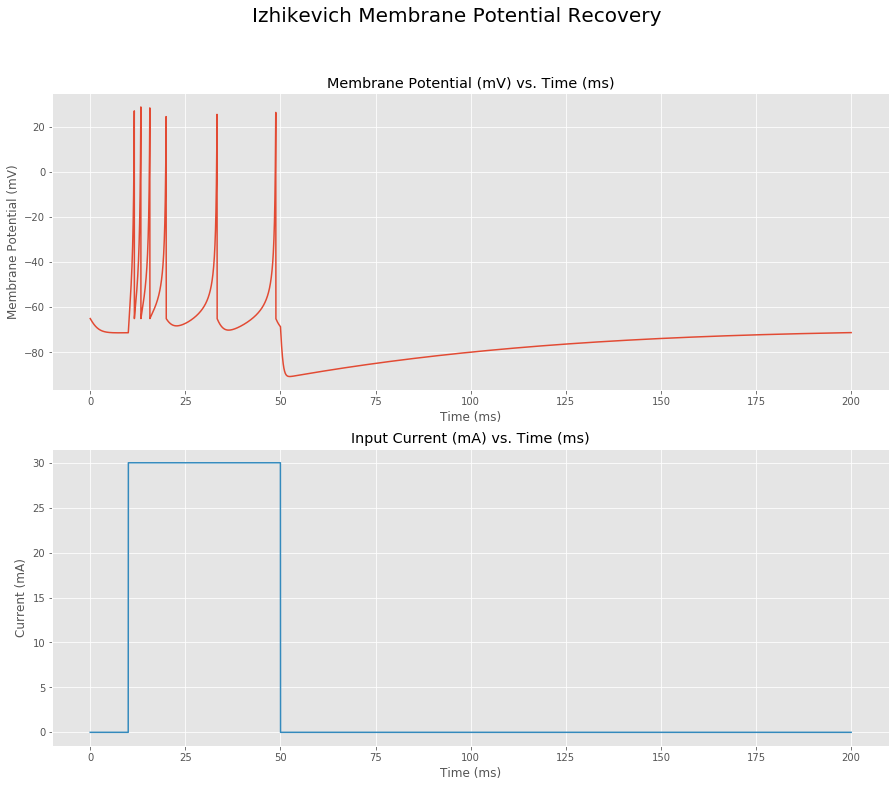

In [4]:
T = 200
dT = 0.02
time = np.arange(0, T + dT, dT)
I = np.zeros(len(time))
I[500:2500] = 30

V = Izhikevich(I=I, a=0.02, b=0.2, c=-65, d=8)

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 12))
fig.suptitle("Izhikevich Membrane Potential Recovery", fontsize=20)

ax1.plot(time, V, label="Membrane Potential")
ax1.set_title("Membrane Potential (mV) vs. Time (ms)")
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xlabel("Time (ms)")

ax2.plot(time, I, "C1", label="Input Current")
ax2.set_title("Input Current (mA) vs. Time (ms)")
ax2.set_ylabel("Current (mA)")
ax2.set_xlabel("Time (ms)")

plt.show()
